In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

691

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Description added to 
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | brownsville
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | utrecht
Processing Record 4 of Set 1 | george town
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | sept-iles
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | meyungs
City not found. Skipping...
Processing Record 10 of Set 1 | yerbogachen
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | soyo
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | rosehearty
Processing Record 16 of Set 1 | abha
Processing Record 17 of Set 1 | san juan de colon
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | san pedro
Processing Record 21 of Set 1 | warrensburg
Processing Record 22 of Set 1 | bonavista
Processing 

Processing Record 39 of Set 4 | stephenville
Processing Record 40 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 41 of Set 4 | salou
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | barawe
City not found. Skipping...
Processing Record 46 of Set 4 | tekirdag
Processing Record 47 of Set 4 | karasjok
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | marzuq
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | yushu
Processing Record 3 of Set 5 | labuhan
Processing Record 4 of Set 5 | vilyuysk
Processing Record 5 of Set 5 | bara
Processing Record 6 of Set 5 | srinagar
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | cache creek
Processing Record 9 of Set 5 | maroantsetra
P

Processing Record 26 of Set 8 | tura
Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | berdigestyakh
Processing Record 30 of Set 8 | nandi hills
Processing Record 31 of Set 8 | arlit
Processing Record 32 of Set 8 | thunder bay
Processing Record 33 of Set 8 | diffa
Processing Record 34 of Set 8 | tawang
Processing Record 35 of Set 8 | fairlie
Processing Record 36 of Set 8 | nasrullaganj
City not found. Skipping...
Processing Record 37 of Set 8 | xuzhou
Processing Record 38 of Set 8 | mogadishu
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | buta
Processing Record 41 of Set 8 | andenes
Processing Record 42 of Set 8 | codrington
Processing Record 43 of Set 8 | teya
Processing Record 44 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 45 of Set 8 | flinders
Processing Record 46 of Set 8 | ous
Processing Record 47 of Set 8 | furstenwalde
Processing Record 48 of Set 8 | birjand
Processin

City not found. Skipping...
Processing Record 16 of Set 12 | puerto del rosario
Processing Record 17 of Set 12 | gravdal
Processing Record 18 of Set 12 | sumenep
Processing Record 19 of Set 12 | lahat
Processing Record 20 of Set 12 | china
Processing Record 21 of Set 12 | rio formoso
Processing Record 22 of Set 12 | sorong
Processing Record 23 of Set 12 | adrar
Processing Record 24 of Set 12 | ibra
Processing Record 25 of Set 12 | toora-khem
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | pilar
Processing Record 28 of Set 12 | kuusamo
Processing Record 29 of Set 12 | kongsberg
Processing Record 30 of Set 12 | back mountain
Processing Record 31 of Set 12 | uk
City not found. Skipping...
Processing Record 32 of Set 12 | karaul
City not found. Skipping...
Processing Record 33 of Set 12 | hambantota
Processing Record 34 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 35 of Set 12 | corrientes
Processing Record 36 of Set 12 | hihifo
City not found.

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Brownsville,US,25.9018,-97.4975,73.38,64,1,4.00,clear sky
1,Atuona,PF,-9.8000,-139.0333,78.82,76,32,23.06,scattered clouds
2,Utrecht,NL,52.0000,5.2500,44.10,93,100,4.00,overcast clouds
3,George Town,MY,5.4112,100.3354,75.88,95,40,0.00,light rain
4,Butaritari,KI,3.0707,172.7902,81.21,81,35,11.36,light rain
5,Sept-Iles,CA,50.2001,-66.3821,29.05,74,20,4.61,few clouds
6,Hermanus,ZA,-34.4187,19.2345,61.90,76,58,12.28,broken clouds
7,Yerbogachen,RU,61.2767,108.0108,-1.59,97,100,6.58,overcast clouds
8,Soyo,AO,-6.1349,12.3689,79.63,88,100,8.93,light rain
9,Bengkulu,ID,-3.8004,102.2655,75.25,87,99,9.60,overcast clouds


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

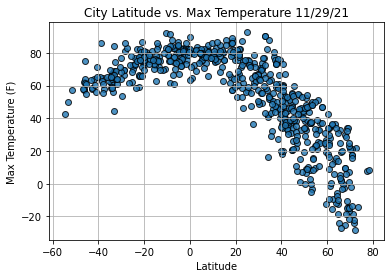

In [10]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

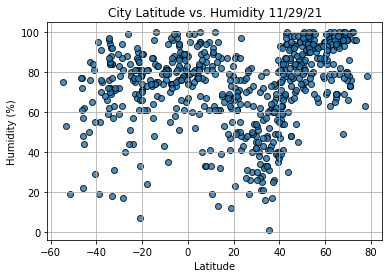

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

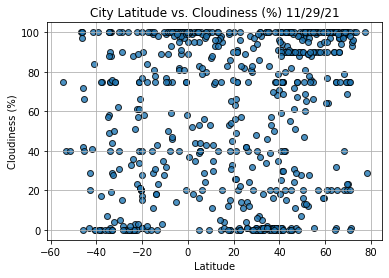

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

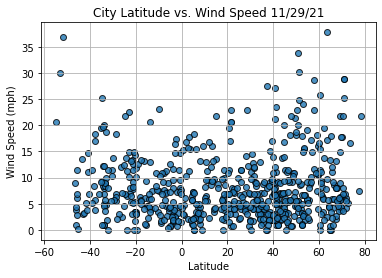

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()